## PAMTRA Combined HMP analysis

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pyPamtra
import datetime
import numpy as np
import pandas as pd
import pickle
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

import xarray as xr
get_ipython().run_line_magic('matplotlib', 'inline')

from scipy.stats import pearsonr
import os
import sys
sys.path.insert(1,os.getcwd()+"//..//retrieval//")
import Regression_Retrieval
import PAMTRA_sim_analysis

In [2]:
import os 
plot_path=os.getcwd()+"/plots/"
take_all_available_files=True
take_random_days=False
take_snd_random_days=False
take_rd_random_days=False
add_noise=True
ar_plot_path=plot_path+"synth_ARs/"
if take_random_days:
    ar_plot_path=plot_path+"rand_days/"
    if take_snd_random_days:
        ar_plot_path=plot_path+"snd_rand_days/"
    if take_rd_random_days:
        ar_plot_path=plot_path+"rd_rand_days/"
if take_all_available_files:
    ar_plot_path=plot_path+"new_all_days/"
if not os.path.exists(plot_path):
    os.makedirs(plot_path)
if not os.path.exists(ar_plot_path):
    os.makedirs(ar_plot_path)

hour_to_analyse="12"
do_appendix_plots=True

### Simulated Days existent

In [4]:
PAMTRASIM_analysis=PAMTRA_sim_analysis.PAMTRASIM_analysis
all_available_days=PAMTRASIM_analysis.list_all_simulated_days(data_path="/work/bb1320/hdorff/pamtra_hamp_retrieval/",hour=hour_to_analyse)
#
#print(all_available_days)
# list of predefined days
#['19790312', '19810330', '19810424', '19820320', '19820416', '19830316', '19830331', '19830414', 
#'19840308', '19840413', '19840428', '19880330', '19890422', '19900409', '19900411', '19900418', 
#'19910301', '19910428', '19920302', '19920413', '19930303', '19930430', '19940421', '19950306', 
#'19950317', '19970322', '19980324', '19980409', '20030415', '20050401', '20060317', '20070324',
#'20080313', '20080404', '20080411', '20080430', '20090324', '20100323', '20110311', '20110329', 
#'20110413', '20140309', '20140330', '20160409', '20180319', '20180326', '20200326', '20220315', 
#'20220316', '20220410']


101  days are already simulated
['19790312', '19810308', '19810314', '19810330', '19810424', '19820312', '19820320', '19820416', '19830314', '19830316', '19830331', '19830414', '19840308', '19840413', '19840428', '19850429', '19860412', '19870325', '19870326', '19880324', '19880330', '19890422', '19900409', '19900411', '19900417', '19900418', '19910301', '19910326', '19910424', '19910428', '19920302', '19920323', '19920413', '19930303', '19930423', '19930430', '19940305', '19940328', '19940421', '19950306', '19950313', '19950317', '19950430', '19960330', '19960422', '19970322', '19980324', '19980327', '19980409', '19990325', '19990326', '20000312', '20000331', '20020307', '20030415', '20050401', '20050410', '20050415', '20060317', '20070324', '20070421', '20070428', '20080313', '20080404', '20080411', '20080421', '20080430', '20090324', '20090416', '20100323', '20110311', '20110316', '20110317', '20110329', '20110413', '20110416', '20110423', '20120312', '20130313', '20130405', '201304

In [5]:
if not take_random_days:
    synth_ar_dates=["20110317",
        "20110423","20150314",
        "20160311","20180224",
        "20180225","20190319",
        "20200416","20200419"
    ]
else:
    synth_ar_dates=['19820320','19900409',
                    '19910428', '19950306',
                    '19970322','20050418',
                    '20170425','20210331']
    if take_snd_random_days:
        synth_ar_dates=['19820320', '19840308', 
                         '19900409', '19910428',
                         '19950306', '19970322',
                         '20080313', '20110311',
                         ]
        #['20040301', '19970410',
                       # '20060417', '19940330',
                       # '20140322', '19950410',
                       # '19990423', '20190421'] #second dates
    # third days
if take_all_available_files:
        synth_ar_dates=['19790312', '19810330', '19810424', '19820320', '19820416', '19830316', '19830331', '19830414',
                        '19840308', '19840413', '19840428', '19880330', '19890422', '19900409', '19900411', '19900418',
                        '19910301', '19910428', '19920302', '19920413', '19930303', '19930430', '19940421', '19950306',
                        '19950317', '19970322', '19980324', '19980409', '20030415', '20050401', '20060317', '20070324',
                        '20080313', '20080404', '20080411', '20080430', '20090324', '20100323', '20110311', '20110329', 
                        '20110413', '20140309', '20140330', '20160409', '20180319', '20180326', '20200326', '20220315', 
                        '20220316', '20220410']#all_available_days -- will be updated
        synth_ar_dates=all_available_days
new_dates=synth_ar_dates#['19820416', '19880330', '20080411']#synth_ar_dates
                    #new_dates=["20220312","20220313","20220314","20220315","20220316","20220320","20220321"]# ['20190411', '20020413', '19920330', '19900312', '20200420', '19950404', '20210421', 
           #'20170301', '19790313','19860407', '20160411', '20140320', '19930304', '19790426',
           #'20020401', '19920415', '19820322', '19840425', '19820414', '20060330']
print(str(len(synth_ar_dates))+" Dates for retrieval:",new_dates)

101 Dates for retrieval: ['19790312', '19810308', '19810314', '19810330', '19810424', '19820312', '19820320', '19820416', '19830314', '19830316', '19830331', '19830414', '19840308', '19840413', '19840428', '19850429', '19860412', '19870325', '19870326', '19880324', '19880330', '19890422', '19900409', '19900411', '19900417', '19900418', '19910301', '19910326', '19910424', '19910428', '19920302', '19920323', '19920413', '19930303', '19930423', '19930430', '19940305', '19940328', '19940421', '19950306', '19950313', '19950317', '19950430', '19960330', '19960422', '19970322', '19980324', '19980327', '19980409', '19990325', '19990326', '20000312', '20000331', '20020307', '20030415', '20050401', '20050410', '20050415', '20060317', '20070324', '20070421', '20070428', '20080313', '20080404', '20080411', '20080421', '20080430', '20090324', '20090416', '20100323', '20110311', '20110316', '20110317', '20110329', '20110413', '20110416', '20110423', '20120312', '20130313', '20130405', '20130426', '2

In [6]:
var_to_retrieve="LWP"

In [7]:
def add_noise_to_tb(tb_df):
    # create randomn vector
    # k,v band noise 0:14
    for kv_band_freq in range(14):
        random_noise=np.random.random_sample(tb_df.shape[0])
        values=pd.Series(data=-0.25 + 0.5*random_noise,index=tb_df.index)
        tb_df.iloc[:,kv_band_freq]=tb_df.iloc[:,kv_band_freq]+values
    for other_freq in np.arange(14,int(tb_df.shape[1]-1)):
        random_noise=np.random.random_sample(tb_df.shape[0])
        values=pd.Series(data=-0.5 + 1.0*random_noise,index=tb_df.index)
        tb_df.iloc[:,other_freq]=tb_df.iloc[:,other_freq]+values

    return tb_df

def get_data_for_obs_height(obs_height,obs_heights,new_dates,hour_to_analyse):
    #print("Observation height:",height)
    h=obs_heights.iloc[obs_heights.values==obs_height].index
    for d,date_to_analyse in enumerate(new_dates):#synth_ar_dates):
        #print(date_to_analyse)
        sim_cls=PAMTRASIM_analysis(data_path="/work/bb1320/hdorff/pamtra_hamp_retrieval/",date=date_to_analyse,hour=hour_to_analyse)
        #if d==0:
            # for height indices
            #sim_cls.open_era5_tbs()
            #tbs=sim_cls.pamtra_ds
        sim_cls.get_era5_hmps()
        temp_era5_hmp=sim_cls.era5_hmp.copy()
        sim_cls.open_pamtra_tbs_ocean()
        height_tbs=np.squeeze(sim_cls.tb_da.isel(nout=h).values,axis=1)
        temp_df=pd.DataFrame(data=height_tbs,columns=sim_cls.tb_da.freq)
        temp_df.index=temp_df.index+int(date_to_analyse)*1000 
        temp_df["Date"]=date_to_analyse
        del temp_df[182.71]
        if d==0:
            tb_df=temp_df
            
            HMP_df=temp_era5_hmp
        else:
            tb_df=pd.concat([tb_df,temp_df])
            HMP_df=pd.concat([HMP_df,temp_era5_hmp])
    if add_noise:
        #print("add noise to bright band temperatures")
        tb_df=add_noise_to_tb(tb_df)
    
    return HMP_df,tb_df

#########################################################################################
#PAMTRASIM_analysis=PAMTRA_sim_analysis.PAMTRASIM_analysis
HMP_dict={}
TBs_dict={}
HMP_df=pd.DataFrame(columns=["Date","IWV","LWP","IWP","SWP","RWP"])
obs_heights=pd.Series(data=[16000.,15400.,15200.,15000.,14800.,14600.,14400.,14200.,
             14000.,13800.,13600., 13400., 13200., 13000., 12800., 12600., 12400., 12200.,
             12000., 11800.,11600., 11400., 11200., 11000., 10800., 10600., 10400., 10200., 10000.,
             9800.,9600.,  9400.,  9200.,  9000.,  8800.,  8600.,  8400.,  8200.,  8000.,
             7800.,7600.,  7400.,  7200.,  7000.])


for h,height in enumerate(obs_heights):
    
    HMP_df,tb_df=get_data_for_obs_height(height,obs_heights,new_dates,hour_to_analyse)
    
    HMP_dict[str(int(height))]=HMP_df
    TBs_dict[str(int(height))]=tb_df
    Regression_Retrieval.Regression_Retrieval.updt(obs_heights.shape[0],h)

[####################] 98% 

### Histogram HMP (exemplary height)

Figure saved as: /home/u/u300737/era5_hamp_pamtra/hamp_retrieval_haloac3/notebooks/plots/new_all_days/Synth_AR_LWP_dist_12UTC.png


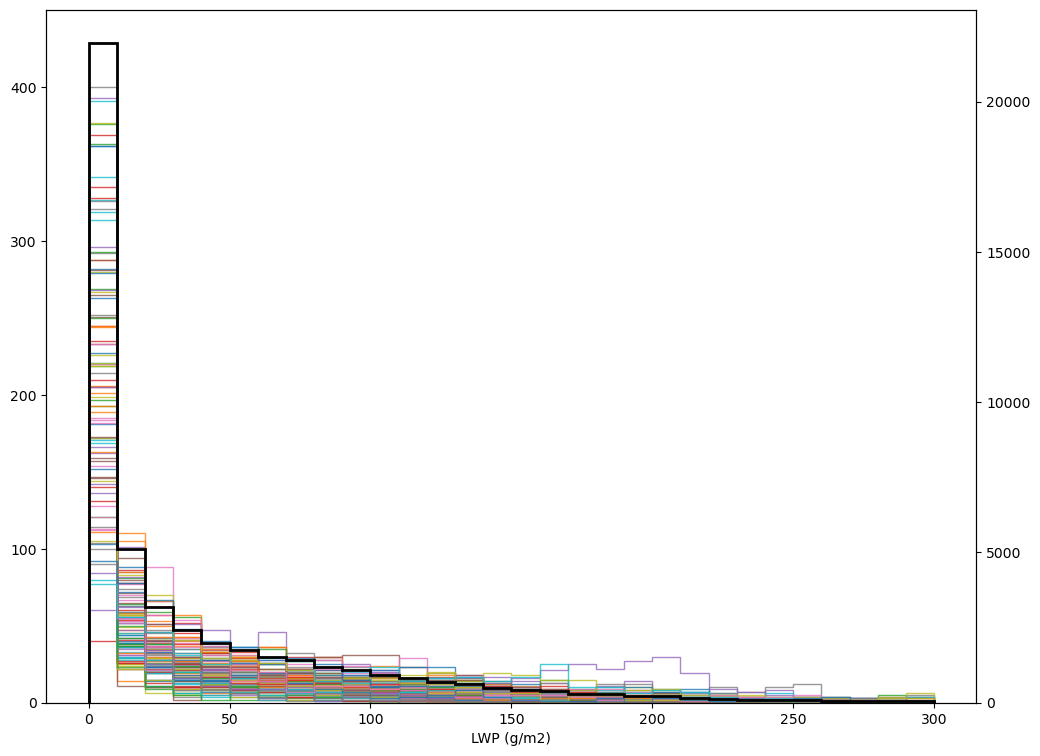

In [8]:
if do_appendix_plots:
    grouped_HMP_df = HMP_df.groupby('Date')
    hmp_fig=plt.figure(figsize=(12,9))
    ax1=hmp_fig.add_subplot(111)
    if var_to_retrieve=="IWV":
        hmp_bins=np.linspace(0,25,26)
        unit=" (kg/m2)"
    else:
        hmp_bins=np.linspace(0,300,31)
        unit=" (g/m2)"
    for date in [*grouped_HMP_df.groups.keys()]:
        sub_hist=HMP_df[HMP_df["Date"]==date]
        hmp=sub_hist[var_to_retrieve]
        if not var_to_retrieve=="IWV":
            hmp=hmp*1000
        ax1.hist(hmp,histtype="step",alpha=0.8,bins=hmp_bins)
    ax2=ax1.twinx()
    ax1.set_xlabel(var_to_retrieve+unit)
    hmp_all=HMP_df[var_to_retrieve]
    if not var_to_retrieve=="IWV":
        hmp_all=hmp_all*1000
        #ax1.set_xscale("log")
    ax2.hist(hmp_all,histtype="step",alpha=1.0,bins=hmp_bins,color="k",linewidth=2)
    fig_name=ar_plot_path+"Synth_AR_"+var_to_retrieve+"_dist_"+hour_to_analyse+"UTC.png"
    hmp_fig.savefig(fig_name,dpi=300,bbox_inches="tight")
    print("Figure saved as:", fig_name)
    #plt.hist(car_df.get_group('rwd')['price'], edgecolor='black',color='brown',rwidth=0.7,alpha=0.6,label='rwd')

### TB hist (exemplary height)

Figure saved as: /home/u/u300737/era5_hamp_pamtra/hamp_retrieval_haloac3/notebooks/plots/new_all_days/Synth_ARs_TB_LWP_Corr_12UTC.png


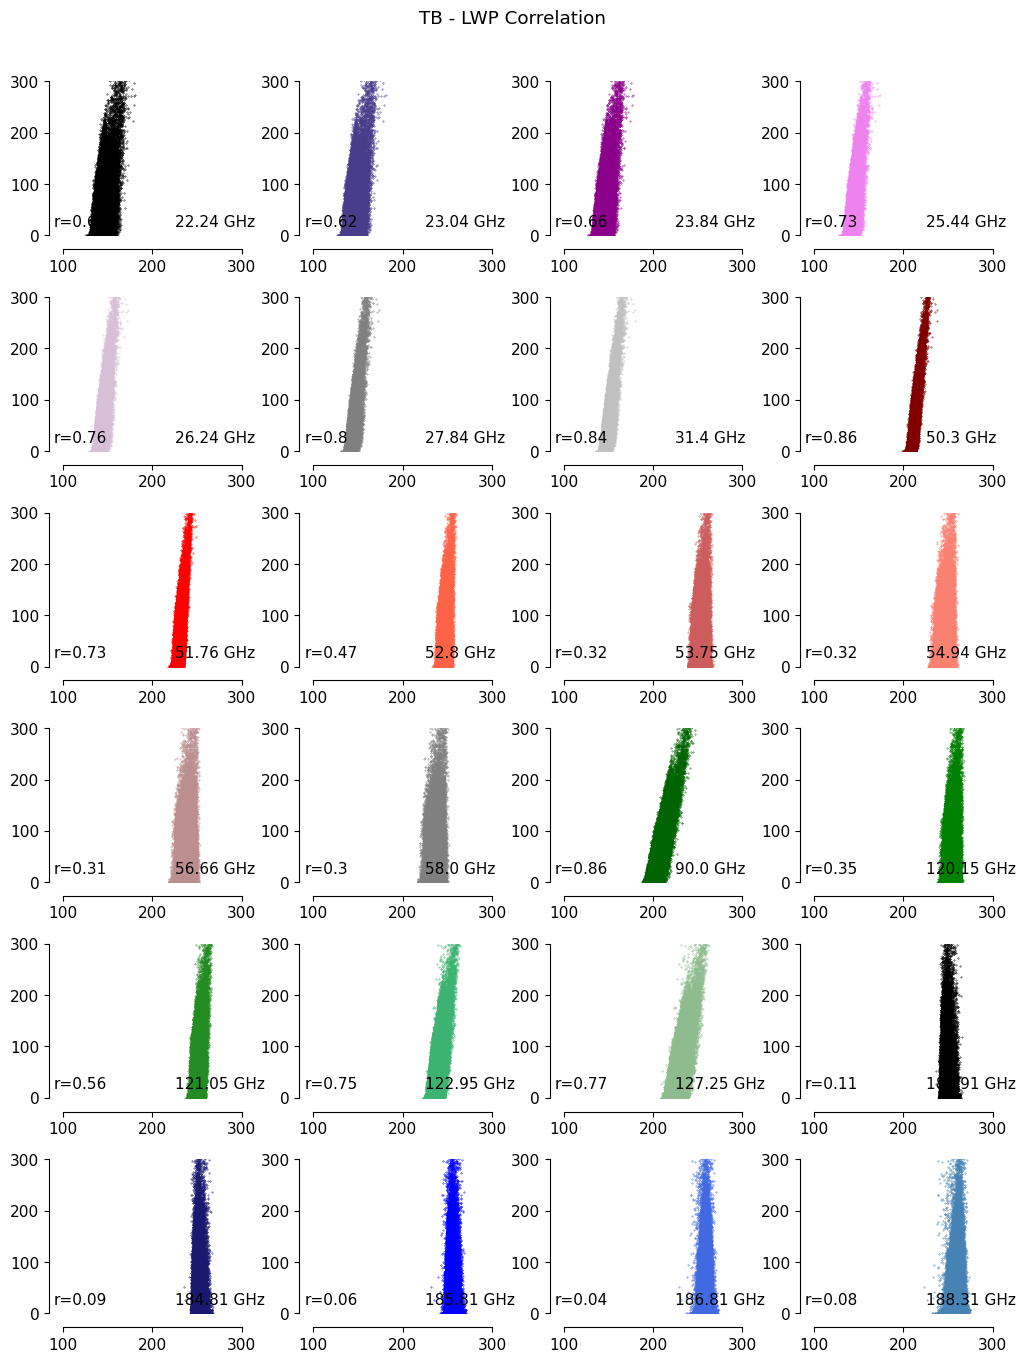

In [9]:
if do_appendix_plots:
    import matplotlib
    #### Hydrometeor histogram
    matplotlib.rcParams.update({"font.size":11})
    import seaborn as sns
    tb_hmp_fig,axes=plt.subplots(6,4,figsize=(12,16))

    i=0
    colors_list=["k","darkslateblue","darkmagenta","violet","thistle","gray","silver",#
            "maroon","red","tomato","indianred","salmon","rosybrown","grey",#
             "darkgreen","green","forestgreen","mediumseagreen","darkseagreen",#
            "k","midnightblue","blue","royalblue","steelblue","skyblue","grey"]
    #print(HMP_df.shape)
    #print(tb_df.shape)

    hmp_data=HMP_df[var_to_retrieve].copy()
    if not var_to_retrieve=="IWV":
        hmp_data*=1000

    for ax in axes.flat:
        tb=tb_df.iloc[:,i]
        ax.scatter(tb,hmp_data,s=0.1,c=colors_list[i])
        ax.set_ylim([0,hmp_bins[-1]])
        ax.set_xlim([100,300])
        ax.text(225,17.5,s=str(round(tb_df.columns[i],2))+" GHz")
        corr, _ = pearsonr(tb,hmp_data)
        ax.text(90,17.5,"r="+str(round(corr,2)))
        i+=1
    
    sns.despine(offset=10)               
    tb_hmp_fig.subplots_adjust(hspace=0.4,wspace=0.4)
    tb_hmp_fig.suptitle("TB - "+var_to_retrieve+" Correlation",y=0.925)
    fig_name=ar_plot_path+"Synth_ARs_TB_"+var_to_retrieve+"_Corr_"+hour_to_analyse+"UTC.png"
    tb_hmp_fig.savefig(fig_name,dpi=300,bbox_inches="tight")
    print("Figure saved as:",fig_name)

# Retrieval block (exemplary height)

In [10]:
def single_height_retrieval(obs_height,TBs_dict,HMP_dict,hour_to_retrieve):
    HMP_df=HMP_dict[str(int(obs_height))]
    tb_df=TBs_dict[str(int(obs_height))]
    brightness_Ts=tb_df.copy()
    state_vector=HMP_df[var_to_retrieve].values
    if not var_to_retrieve=="IWV":
        state_vector*=1000
    order=2
    # Perform Regression-Retrieval
    Retrieval=retrieval(state_vector,var_to_retrieve,brightness_Ts,order,synth_ar_dates,ar_plot_path,added_noise=add_noise,obs_height=obs_height,
                       hour=hour_to_retrieve) #---> add obs height for retrieval
    Retrieval.entire_regression()
    Retrieval.m_est_as_csv()
    # Get the retrieval coefficients estimates (fits)
    m_est=Retrieval.m_est
    return m_est


retrieval=Regression_Retrieval.Regression_Retrieval
HMP_df[var_to_retrieve]

19790312000    0.224391
19790312001    0.241814
19790312002    0.217807
19790312003    0.160572
19790312004    0.010843
                 ...   
20220310518    0.077133
20220310519    0.070523
20220310520    0.049844
20220310521    0.044069
20220310522    0.057287
Name: LWP, Length: 48210, dtype: float64

## Training

In [11]:
for h,height in enumerate(obs_heights):
    single_height_retrieval(height,TBs_dict,HMP_dict,hour_to_analyse)
#brightness_Ts=tb_df.copy()
#state_vector=HMP_df[var_to_retrieve].values
#if not var_to_retrieve=="IWV":
#    state_vector*=1000
#order=2
# Perform Regression-Retrieval
#Retrieval=retrieval(state_vector,var_to_retrieve,brightness_Ts,order,synth_ar_dates,ar_plot_path,added_noise=add_noise)
#Retrieval.entire_regression()
#Retrieval.m_est_as_csv()
# Get the retrieval coefficients estimates (fits)
#m_est=Retrieval.m_est
#m_est.shape
#Tb_K_reg=#Retrieval.build_K_reg(y,order=2)

Retrieval coeffs saved as: /home/u/u300737/era5_hamp_pamtra/hamp_retrieval_haloac3/notebooks/plots/new_all_days//LWP/LWP_Retrieval_coeffs_16000_12UTC.csv
Retrieval coeffs saved as: /home/u/u300737/era5_hamp_pamtra/hamp_retrieval_haloac3/notebooks/plots/new_all_days//LWP/LWP_Retrieval_coeffs_15400_12UTC.csv
Retrieval coeffs saved as: /home/u/u300737/era5_hamp_pamtra/hamp_retrieval_haloac3/notebooks/plots/new_all_days//LWP/LWP_Retrieval_coeffs_15200_12UTC.csv
Retrieval coeffs saved as: /home/u/u300737/era5_hamp_pamtra/hamp_retrieval_haloac3/notebooks/plots/new_all_days//LWP/LWP_Retrieval_coeffs_15000_12UTC.csv
Retrieval coeffs saved as: /home/u/u300737/era5_hamp_pamtra/hamp_retrieval_haloac3/notebooks/plots/new_all_days//LWP/LWP_Retrieval_coeffs_14800_12UTC.csv
Retrieval coeffs saved as: /home/u/u300737/era5_hamp_pamtra/hamp_retrieval_haloac3/notebooks/plots/new_all_days//LWP/LWP_Retrieval_coeffs_14600_12UTC.csv
Retrieval coeffs saved as: /home/u/u300737/era5_hamp_pamtra/hamp_retrieval_h

## Testing

In [12]:
date_to_test="20070428"#"20161013"#"20150314"#"20161013"
sim_cls=PAMTRASIM_analysis(date=date_to_test,data_path="/work/bb1320/hdorff/pamtra_hamp_retrieval/",hour="10")
sim_cls.open_pamtra_tbs_ocean()
sim_cls.get_era5_hmps()
print(sim_cls.era5_hmp)
#sys.exit()
tb_df_new=pd.DataFrame(data=sim_cls.tb_da.values,columns=sim_cls.tb_da.freq)
print(tb_df_new)
#tb_df_new=tb_df_new.loc[sim_cls.open_ocean==1]
hmp_day=sim_cls.era5_hmp[var_to_retrieve]
if not var_to_retrieve=="IWV":
    hmp_day*=1000

                 Date        IWV       LWP       IWP       SWP       RWP
20070428000  20070428  22.459446  0.612533  0.156964  0.411837  0.031436
20070428001  20070428  22.241940  0.335844  0.045112  0.029416  0.001507
20070428002  20070428  22.198973  0.461457  0.202447  0.379750  0.018690
20070428003  20070428  22.103916  0.307644  0.048906  0.040850  0.001647
20070428004  20070428  21.322046  0.364598  0.250844  0.403039  0.013270
...               ...        ...       ...       ...       ...       ...
20070428502  20070428   4.929556  0.000648  0.033117  0.029614  0.000000
20070428503  20070428   4.813817  0.001811  0.041649  0.032238  0.000000
20070428504  20070428   4.602646  0.001342  0.025058  0.018468  0.000000
20070428505  20070428   4.969245  0.000657  0.024035  0.020260  0.000000
20070428506  20070428   5.640959  0.002290  0.034664  0.026628  0.000000

[507 rows x 6 columns]


ValueError: Must pass 2-d input. shape=(507, 44, 26)

In [13]:
del tb_df_new[182.71]
Retrieval.y=tb_df_new
#print(tb_df_new)
Retrieval.build_K_reg()
TB_K_reg_new=Retrieval.K_reg
#print(TB_K_reg_new)
hmp_retrieved=m_est.dot(TB_K_reg_new.T)

NameError: name 'tb_df_new' is not defined

## Compare Testing and Truth

In [ ]:
import seaborn as sns

#import matplotlib
matplotlib.rcParams.update({"font.size":16})
iwv_test_fig=plt.figure(figsize=(12,9))
ax1=iwv_test_fig.add_subplot(111)
ax1.hist(hmp_day,rwidth=0.3,align="left",alpha=0.5,bins=hmp_bins,color="k",label="ERA5 "+var_to_retrieve)
ax1.hist(hmp_retrieved,rwidth=0.3,align="mid",alpha=0.5,bins=hmp_bins,color="green",label="Retrieved "+var_to_retrieve)
if var_to_retrieve=="IWV":
    ax1.set_xlabel("IWV (kg/m2)")
else:
    ax1.set_xlabel(var_to_retrieve+" (g/m2)")
ax1.legend()
ax1.set_xlim([0,hmp_bins[-1]])
#ax1.set_ylim([0,150])
sns.despine(offset=5)
iwv_test_fig.savefig(ar_plot_path+var_to_retrieve+"_Retrieval_test_"+date_to_test+".png",dpi=200,bbox_inches="tight")


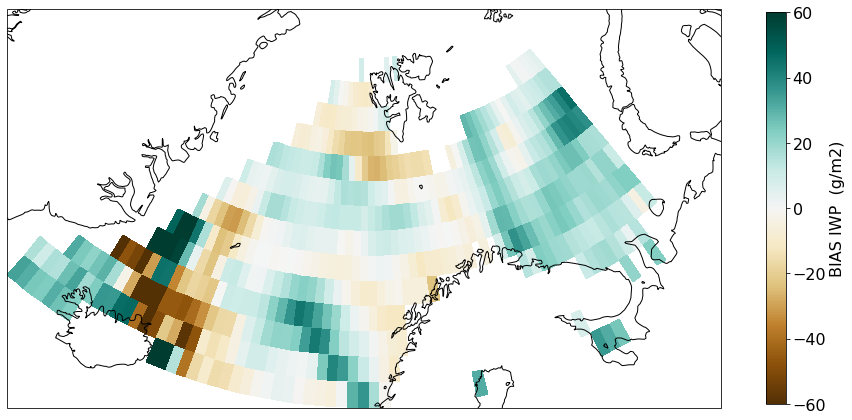

In [15]:
lat=sim_cls.era5_ds.lat[:,0].values
lon=sim_cls.era5_ds.lon[:,0].values
unique_lat=np.unique(lat)
unique_lon=np.unique(lon)
data_2d=pd.DataFrame(data=np.nan,index=unique_lat,columns=unique_lon)
hmp_error=hmp_retrieved-hmp_day
for i,hmp_value in enumerate(hmp_error.values):
    data_2d.loc[lat[i],lon[i]]=float(hmp_value)

data_2d=data_2d.iloc[::-1]
import cartopy.crs as ccrs
set_font=16
matplotlib.rcParams.update({'font.size':set_font})
fig=plt.figure(figsize=(16,12))
proj = ccrs.NorthPolarStereo(central_longitude=10)
data_crs = ccrs.PlateCarree()
ax = plt.axes(projection=proj)
C1=ax.pcolormesh(data_2d.columns,data_2d.index,data_2d.values,vmin=-hmp_bins[-1]/5,vmax=hmp_bins[-1]/5,transform=data_crs,cmap='BrBG')
plt.colorbar(C1,label="BIAS "+var_to_retrieve+" "+unit,shrink=0.6)
ax.coastlines()
fig.savefig(ar_plot_path+var_to_retrieve+"_Retrieval_test_Map"+date_to_test+".png",dpi=200,bbox_inches="tight")


## Coefficient comparison

In [23]:
import glob
#print(plot_path)
coeff_paths=glob.glob(plot_path+"/*")
coeff_dict={}
fname="IWV_Retrieval_coeffs.csv"
for path in coeff_paths:
    sample_str=path.split("/")[-1]
    coeff_dict[sample_str]=pd.read_csv(path+"/"+fname)
    coeff_dict[sample_str].index=coeff_dict[sample_str]["Unnamed: 0"]
    del coeff_dict[sample_str]["Unnamed: 0"]
coeff_dict

FileNotFoundError: [Errno 2] No such file or directory: '/home/u/u300737/era5_hamp_pamtra/plots/halo_ac3/IWV_Retrieval_coeffs.csv'

In [16]:
mean_tb=tb_df.mean(axis=0)
iwv_contr_dict={}
iwv_contr_series=pd.Series(data=np.nan,index=mean_tb.index[:-1])
Retrieval.y=tb_df.iloc[0:2,:-1].values
Retrieval.build_K_reg()
Retrieval.K_reg.T
#print(coeff_dict["snd_rand_days"])
print("M_est",m_est)
print(m_est.shape)
print("Tbs K_reg ",Retrieval.K_reg.T[:,0].shape,Retrieval.K_reg.T[:,0])
m_est.dot(Retrieval.K_reg.T[:,0])
#for i in range(m_est.shape):
iwv_retrieved=np.sum([m_est[i]*Retrieval.K_reg.T[i,0] for i in range(m_est.shape[0])])    
print(iwv_retrieved)
#sys.exit()
#m_est.dot(Retrieval.K_reg.T)
for freq in iwv_contr_series.index:
    freq_str=str(freq)
    tb_step=tb_df.iloc[0,:-1]#mean_tb.loc[freq]
    tb_channel=tb_step.loc[freq]
    #print(tb_channel)
    #print(coeff_dict[sample_str].loc["offset"])
    iwv_contr_series.loc[freq]= coeff_dict[sample_str][freq_str].loc["b**2"]*tb_channel+\
                                    coeff_dict[sample_str][freq_str].loc["a**1"]*tb_channel
                                    #    coeff_dict[sample_str][freq_str].loc["offset"]
                                #coeff_dict[sample_str][freq_str].loc["a**1"]*tb_channel**2+\
#                               
iwv_contr_series.sum()+coeff_dict[sample_str][freq_str].loc["offset"]

M_est [ 2.81120203e+03 -1.50473936e+02  3.12681653e+02 -3.73976500e+02
  1.35094102e+03 -1.33252166e+03 -1.70970341e+02  3.94407801e+02
 -2.84318821e+02  5.93295265e+02 -4.83220700e+02  2.53183432e+02
 -3.11415227e+01  8.25498238e+00 -1.10617920e+00 -1.75382136e+01
 -4.84576216e+01  5.33748456e+01 -1.52704050e+02  5.54755015e+01
  7.07404151e+02 -7.15347613e+02  3.55634064e+01 -4.43994085e+01
  1.24451576e+01  1.48501629e-01  2.47737663e-01 -1.36688812e+00
  5.68785460e+00 -7.86055819e+00  4.23537389e+00 -1.14846986e+00
  6.67172247e-01 -1.32313833e+00  1.02420351e+00 -5.35905581e-01
  7.04477291e-02 -1.72685284e-02  8.65396503e-04  2.79173056e-02
  9.92228010e-02 -1.01643747e-01  3.24962531e-01 -1.18518860e-01
 -1.40698643e+00  1.42451919e+00 -7.10881790e-02  8.68333510e-02
 -2.45577014e-02]
(49,)
Tbs K_reg  (49,) [1.00000000e+00 1.53255204e+02 1.53719954e+02 1.52577529e+02
 1.51142213e+02 1.51261173e+02 1.52582930e+02 1.57908603e+02
 2.19255354e+02 2.34619269e+02 2.46554129e+02 2.462

NameError: name 'sys' is not defined